# Imports

In [1]:
import torch
import torch.nn as nn
import  numpy as np  
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import csv                 


# Data loading

In [2]:
from asyncio.unix_events import BaseChildWatcher


input_size = 784
hidden_size = 100
hidden_size1 = 50 
num_classes = 10
num_epochs = 99
learning_rate = 0.001
batch_size = 100
train_size = 42000


training_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

training_set = training_df.to_numpy()
test_set = test_df.to_numpy()
test_set = torch.Tensor(test_set)

# print(test_set.type())

train = torch.tensor(training_set[0:train_size,1:],dtype=torch.float)
# validation = torch.tensor(training_set[train_size:,1:],dtype=torch.float)

labels_1 = torch.tensor(training_set[:train_size,0])
# labels_2 = torch.tensor(training_set[train_size:,0])

train_set = [(x,y) for x,y in zip(train, labels_1)]
# valid_set = [(x,y) for x,y in zip(test, labels_2)]

train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size= batch_size)
test_loader = torch.utils.data.DataLoader(dataset = test_set)
# valid_loader = torch.utils.data.DataLoader(dataset = valid_set)



# Creating the Layers of the model

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, hidden_size1 ,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size1)
        self.l3 = nn.Linear (hidden_size1, num_classes)

    def forward(self, x):
        out =  self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out  = self.l3(out)
        return out

In [10]:
model = NeuralNet(input_size, hidden_size, hidden_size1, num_classes)
criterion = nn.CrossEntropyLoss()
optimiser =  torch.optim.Adam(model.parameters(), lr = learning_rate)

# Itterations     

In [11]:
for epochs in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        #forward
        # print(images.shape)
        outputs = model.forward(images)
        loss = criterion(outputs,labels)

        #backward
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()



    
    print(epochs, ":", loss.item())




0 : 0.12633855640888214
1 : 0.08144545555114746
2 : 0.07084593176841736
3 : 0.08527415245771408
4 : 0.04969019815325737
5 : 0.01695530116558075
6 : 0.013571759685873985
7 : 0.03479849547147751
8 : 0.019881226122379303
9 : 0.018163934350013733
10 : 0.016751902177929878
11 : 0.031984731554985046
12 : 0.005421509966254234
13 : 0.007945586927235126
14 : 0.014129969291388988
15 : 0.014559349976480007
16 : 0.027705619111657143
17 : 0.04013264179229736
18 : 0.10340166091918945
19 : 0.0006451225490309298
20 : 0.08668612688779831
21 : 0.01141213160008192
22 : 0.011742825619876385
23 : 0.005395533982664347
24 : 0.017349863424897194
25 : 0.012126315385103226
26 : 0.04564396291971207
27 : 0.010706152766942978
28 : 0.012663265690207481
29 : 0.049656499177217484
30 : 0.049988728016614914
31 : 0.00026299155433662236
32 : 0.03174447640776634
33 : 0.07370324432849884
34 : 0.005492386873811483
35 : 0.00015301992243621498
36 : 0.005528195295482874
37 : 0.003445232519879937
38 : 0.0064267246052622795
39 :

In [17]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Training Accuracy of the network on the {n_samples} test images: {acc} %')

Training Accuracy of the network on the 42000 test images: 99.75238095238095 %


In [15]:
torch.save(model, "model_orig.pt")

## Evaluation

In [120]:
header = ['ImageId','Labelpred','Label']
with open('resultcrosscheck.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        not_correct = [0,0,0,0,0,0,0,0,0,0]
        not_correct_idcs = [[],[],[],[],[],[],[],[],[],[]]

        i = 0
        index = []
        for train_row in training_df.to_numpy():
            label = train_row[0]
            img = train_row[1:]

            img = torch.unsqueeze(torch.tensor(img, dtype=torch.float), 0)
            outputs = model(img)
            _, predicted = torch.max(outputs.data, 1)
            # print(predicted.shape)
            n_samples += 1
            # n_correct += (predicted == label).sum().item()
            if predicted == label:
                n_correct += 1
            else:
                not_correct[label] += 1
                not_correct_idcs[label].append(i)

            row = (i,int(predicted),training_set[i,0])
            writer.writerow(row)
            i += 1
            

        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network on the {n_samples} training sample images: {acc} %')

    



Accuracy of the network on the 42000 training sample images: 99.75238095238095 %


In [121]:
not_correct
print(not_correct_idcs[4])


[3217, 4711, 5026, 6580, 8838, 10195, 10544, 10704, 11948, 14372, 14434, 14569, 16301, 18303, 20898, 21127, 22588, 23788, 26182, 26428, 30119, 31754, 33952]


In [71]:
import matplotlib.pyplot as plt

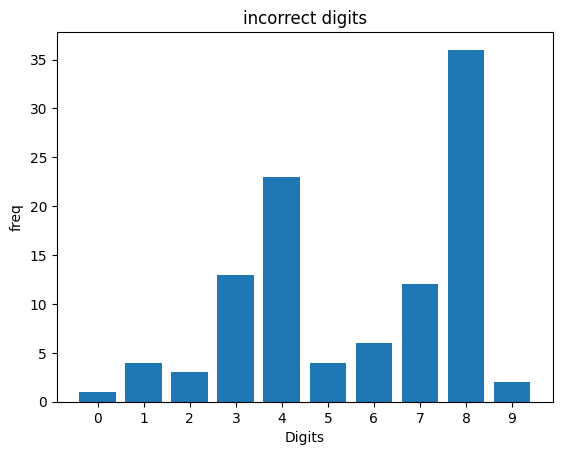

In [94]:
x = np.linspace(0,9,10)

plt.bar(x, not_correct)
plt.xticks(x)
plt.xlabel("Digits")
plt.ylabel("freq")
plt.title("incorrect digits")
plt.show()

In [13]:
header = ['ImageId','Label']
with open('result1.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        i = 1
        for images in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            row = (i,int(predicted))
            writer.writerow(row)
            i += 1
            # n_samples += labels.size(0)
            # n_correct += (predicted == labels).sum().item()

        # acc = 100.0 * n_correct / n_samples
        # print(f'Accuracy of the network on the {n_samples} training sample images: {acc} %')

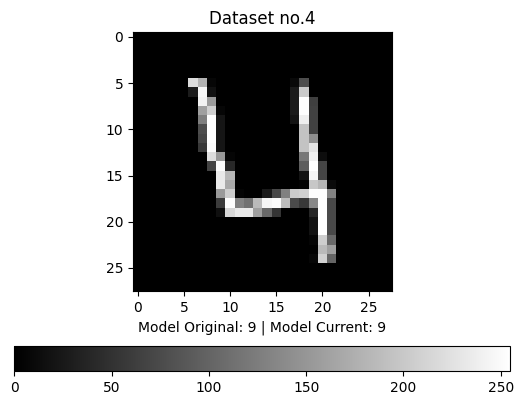

model prediction: 9
model 2 prediction: 9


In [116]:
import cv2
import pylab as plt
import numpy as np


test_number = 3
test_pic = training_df.to_numpy()
test_pic = test_pic[test_number,1:].reshape(28,28)
test_pic.shape
# cv2.imshow("number", test_pic)
df = pd.read_csv('result.csv')
df2 = pd.read_csv('result1.csv')

Z= test_pic
im = plt.imshow(Z, cmap='gray')
plt.colorbar(im, orientation='horizontal')
plt.title(f"Dataset no.{test_number+1}")
plt.xlabel(f"Model Original: {df.iloc[test_number,1]} | Model Current: {df2.iloc[test_number,1]}")
plt.show()


print('model prediction:',df.iloc[test_number,1])
print('model 2 prediction:',df2.iloc[test_number,1])




In [58]:
test_pic = training_df.to_numpy()
eaach = test_pic[0]
eaach[0]

1

In [65]:
not_same = []
for i in range(27999):
    if df.iloc[i,1] == df2.iloc[i,1]:
        pass
    else:
        not_same.append(i+1)
print(len(not_same))

942


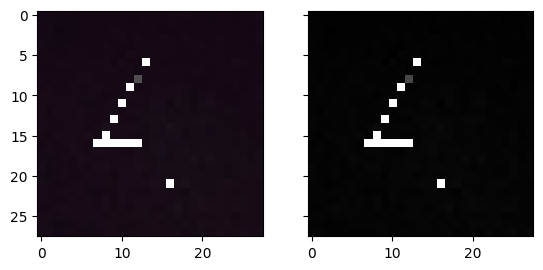

(28, 28)

In [111]:
import numpy as np
import cv2

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
path1 = "four.jpeg"
img_cv = cv2.imread(path1)
img_cv = cv2.resize(img_cv, (28,28))
ax1.imshow(img_cv, cmap='gray')
img_grey = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
ax2.imshow(img_grey, cmap='gray')
# img_grey = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
img = np.asarray(img_grey)

plt.show()
img.shape



In [112]:
img.max()

255

# change to row vector

```python
np.ravel()
```

tensor([[ 2.0833, -1.4032,  3.0740,  0.9953,  0.8953,  1.3519,  3.1572, -3.6180,
          4.0207,  1.5198]])
Predicted number: tensor([8])


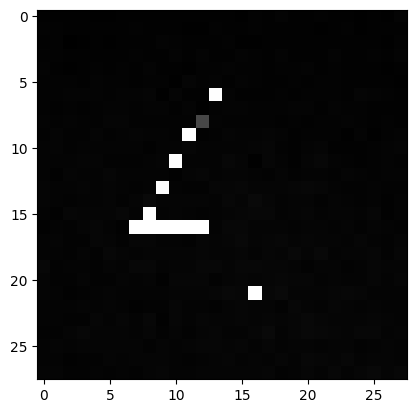

In [113]:
with torch.no_grad():
    plt.imshow(img, cmap='gray')
    img_tens = torch.tensor(img.ravel(),dtype=torch.float)
    img_tens = torch.unsqueeze(img_tens, 0)
    predict = model.forward(img_tens)
print(predict)
_, pred_cls = torch.max(predict.data, 1)
print(f"Predicted number: {pred_cls}")

tensor([2])

In [72]:
train[0].numpy().mean()


21.23597

In [24]:
img_tens.shape

torch.Size([784])

In [25]:
img, lab = next(iter(train_loader))

img.shape

torch.Size([100, 784])

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Training Accuracy of the network on the {n_samples} test images: {acc} %')